In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('dengue.csv')

In [5]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [6]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [9]:
df["Month"] = df["Month"].astype("category")
df["Region"] = df["Region"].astype("category")

<h1>Insight #1: Total Dengue Cases Per Region</h1>
<p>Region IV-A reported the highest overall number of dengue cases among all regions. Regions III and VI also recorded a significant number of cases. In contrast, BARMM and Region V had the lowest total dengue cases compared to the other regions.</p>

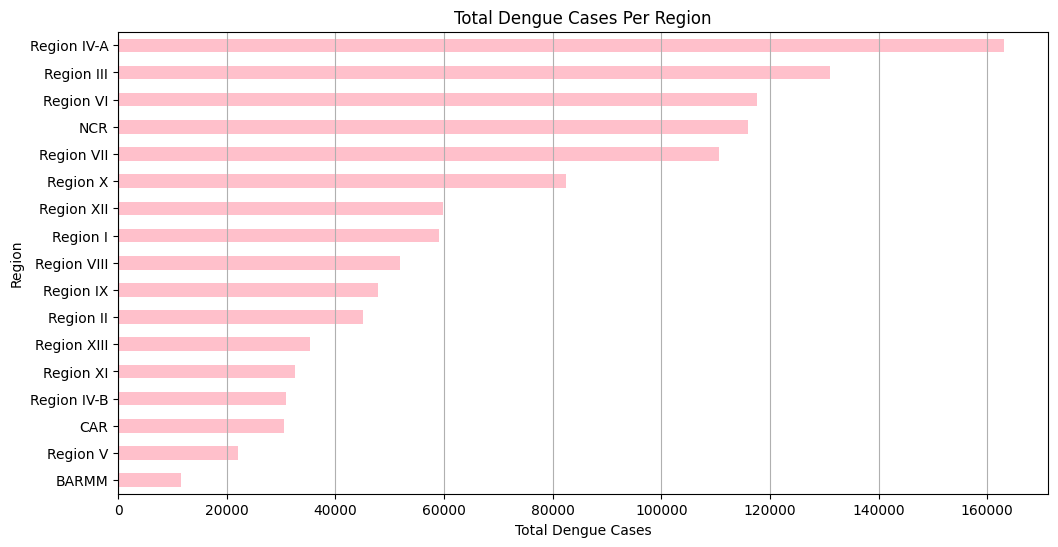

In [12]:
plt.figure(figsize=(12, 6))
df.groupby("Region")["Dengue_Cases"].sum().sort_values().plot(kind="barh", color="Pink")

plt.title("Total Dengue Cases Per Region")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Region")
plt.grid(axis="x")
plt.show()

<h1>Insight #2: Total Dengue Deaths Per Region</h1>
<p>The National Capital Region (NCR) had the most dengue-related deaths among all the regions. Regions XII and VI also saw a notable number of fatalities. On the other hand, Region IV-A reported a moderate death toll, falling between the regions with the highest and lowest numbers..</p>

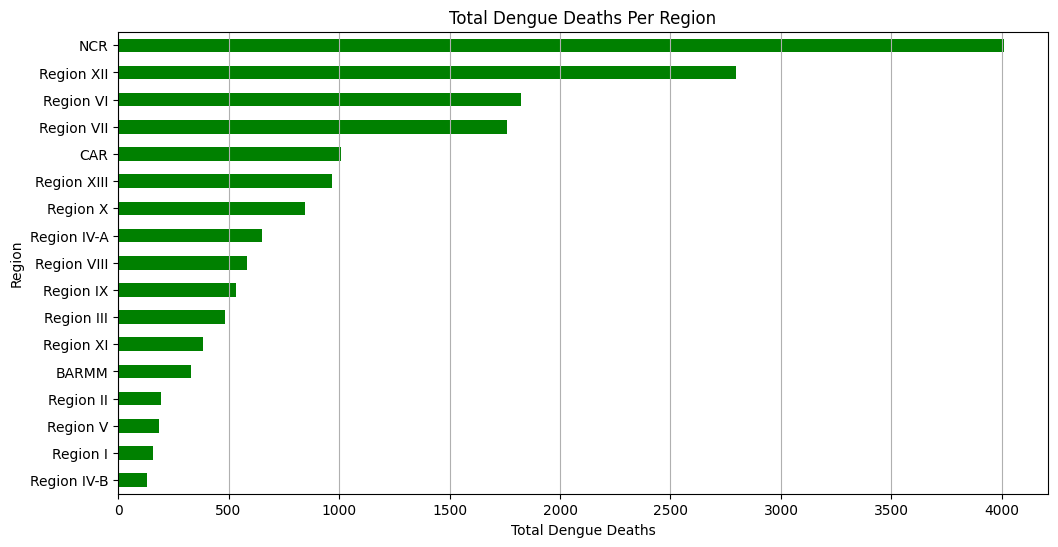

In [14]:
plt.figure(figsize=(12, 6))
df.groupby("Region")["Dengue_Deaths"].sum().sort_values().plot(kind="barh", color="Green")

plt.title("Total Dengue Deaths Per Region")
plt.xlabel("Total Dengue Deaths")
plt.ylabel("Region")
plt.grid(axis="x")
plt.show()

<h1>Insight #3: Dengue Cases vs. Deaths Scatter Plot</h1>
<p>Among all regions, the National Capital Region (NCR) had the highest number of deaths linked to dengue. Regions XII and VI likewise reported a considerable number of fatalities. In comparison, Region IV-A had a moderate total, falling between the highest and lowest death counts.</p>

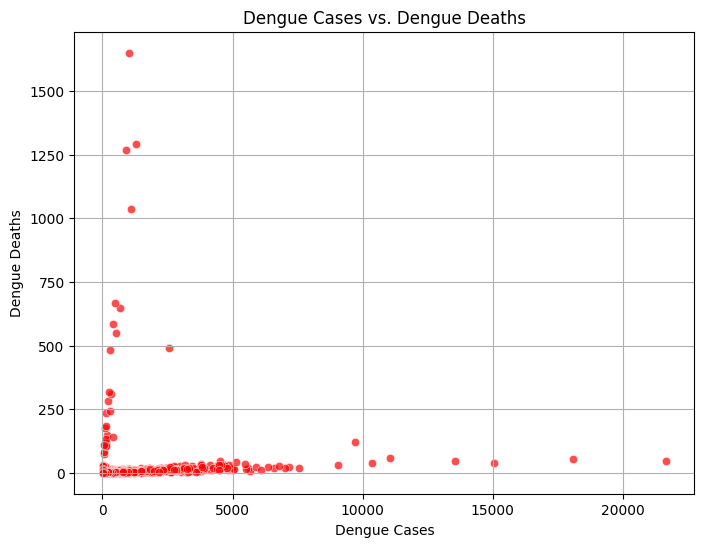

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Dengue_Cases"], y=df["Dengue_Deaths"], alpha=0.7, color="red")

plt.title("Dengue Cases vs. Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

<h1>Insight #4: Rolling Mean of Dengue Cases</h1>
<p>The 3-year rolling average of dengue cases in the Philippines reveals a rising trend leading up to 2019, reflecting an increase in the average number of cases over the previous three years. This average reaches its highest point around 2019, then begins to decline by 2020, suggesting a possible downward shift in the longer-term trend. This smoothed approach helps highlight the overall pattern of dengue incidence by reducing the impact of short-term variations.</p>

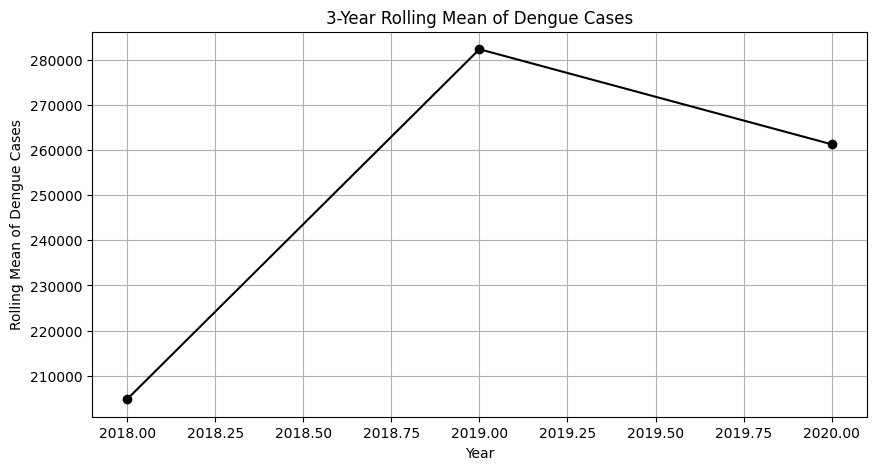

In [19]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Cases"].sum().rolling(window=3).mean().plot(marker="o", linestyle="-", color="Black")

plt.title("3-Year Rolling Mean of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Rolling Mean of Dengue Cases")
plt.grid(True)
plt.show()

<h1>Insight #5: Yearly Average of Dengue Cases
</h1>
<p>The annual average of dengue cases in the Philippines showed fluctuations from 2016 to 2020. There was a drop in cases from 2016 to 2017, followed by a steady rise that peaked in 2019. Afterward, a significant decline was observed in 2020.</p>

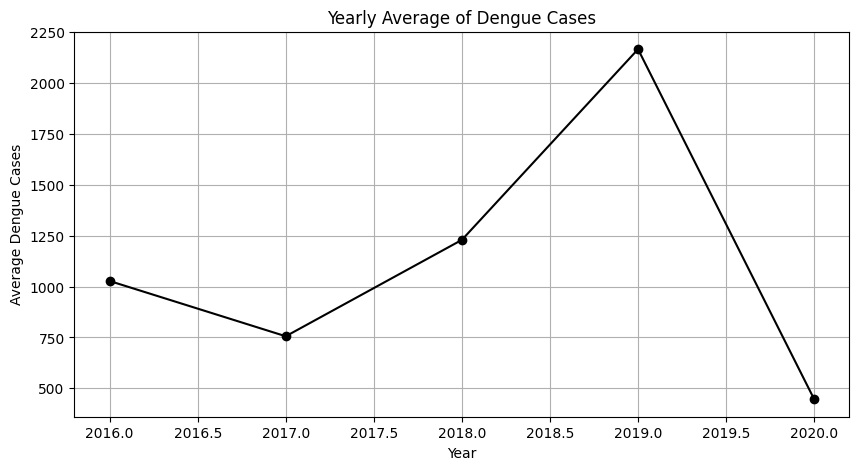

In [21]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Cases"].mean().plot(marker="o", linestyle="-", color="black")

plt.title("Yearly Average of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Average Dengue Cases")
plt.grid(True)
plt.show()

<h1>Insight #6: Yearly Average of Dengue Deaths
</h1>
<p>The yearly average of dengue-related deaths in the Philippines declined notably from 2016 to 2018. Although there was a slight uptick in deaths around 2019, the overall trend points to a significant decrease in fatalities by 2020 compared to the levels recorded in 2016.</p>

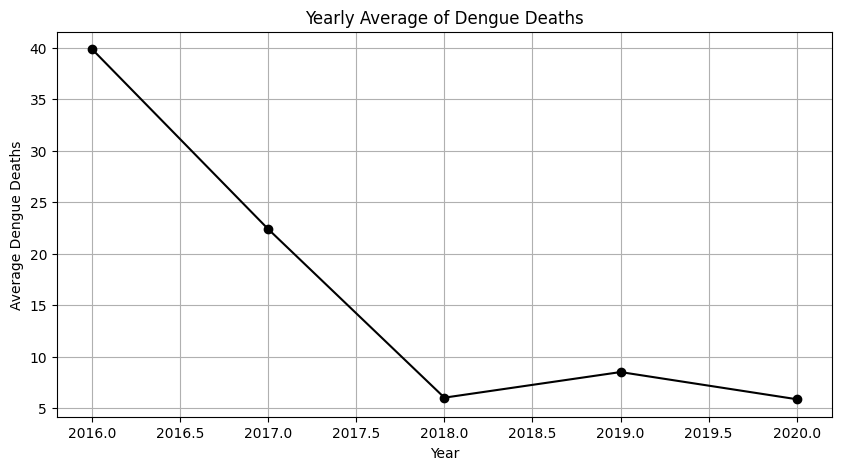

In [24]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Deaths"].mean().plot(marker="o", linestyle="-", color="Black")

plt.title("Yearly Average of Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Average Dengue Deaths")
plt.grid(True)
plt.show()

<h1>Insight #7: Dengue Case Fatality Rate Over Time
</h1>
<p>The dengue case fatality rate (CFR) in the Philippines steadily declined from 2016 to 2019, hitting its lowest point in 2019. Interestingly, even though dengue cases spiked in 2019, the percentage of deaths relative to cases was at its lowest. In contrast, the CFR rose noticeably in 2020, indicating a higher proportion of deaths despite fewer overall cases.</p>

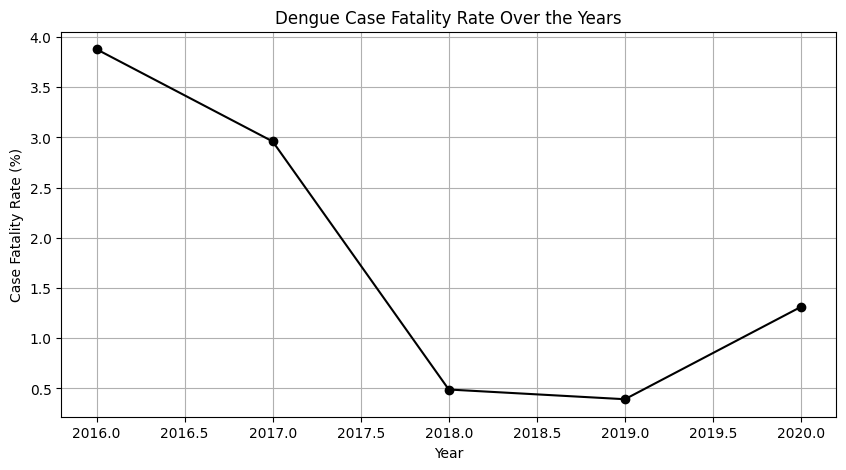

In [26]:
plt.figure(figsize=(10, 5))
fatality_rate = (df.groupby("Year")["Dengue_Deaths"].sum() / df.groupby("Year")["Dengue_Cases"].sum()) * 100
fatality_rate.plot(marker="o", linestyle="-", color="Black")

plt.title("Dengue Case Fatality Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Case Fatality Rate (%)")
plt.grid(True)
plt.show()

<h1>Insight #8: Monthly Dengue Case Fatality Rate

</h1>
<p>The dengue case fatality rate (CFR) in the Philippines steadily declined from 2016 to 2019, hitting its lowest point in 2019. Interestingly, even though dengue cases spiked in 2019, the percentage of deaths relative to cases was at its lowest. In contrast, the CFR rose noticeably in 2020, indicating a higher proportion of deaths despite fewer overall cases.</p>

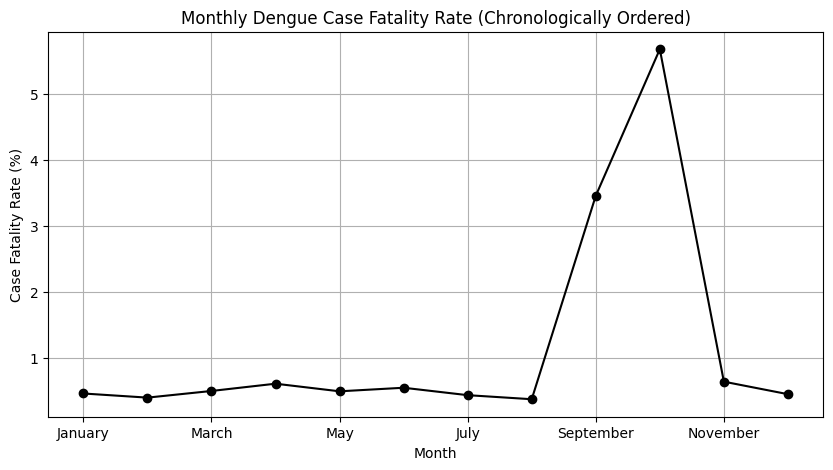

In [28]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_fatality_rate = (df.groupby("Month")["Dengue_Deaths"].sum() / df.groupby("Month")["Dengue_Cases"].sum()) * 100
monthly_fatality_rate.index = pd.Categorical(monthly_fatality_rate.index, categories=month_order, ordered=True)
monthly_fatality_rate = monthly_fatality_rate.sort_index()

plt.figure(figsize=(10, 5))
monthly_fatality_rate.plot(marker="o", linestyle="-", color="black")

plt.title("Monthly Dengue Case Fatality Rate (Chronologically Ordered)")
plt.xlabel("Month")
plt.ylabel("Case Fatality Rate (%)")
plt.grid(True)
plt.show()

<h1>Insight #9: Seasonal Trends in Dengue Cases

</h1>
<p>In the Philippines, the average number of dengue cases tends to be highest during August, September, and July. Cases typically begin to rise in June, reaching a peak in August, before gradually declining toward the year's end. April and May usually record the lowest average number of dengue cases.</p>

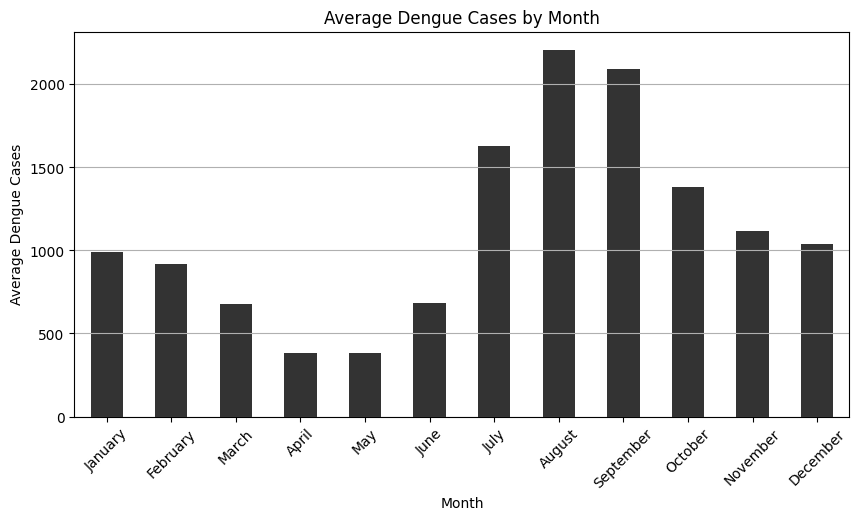

In [30]:
plt.figure(figsize=(10, 5))
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_cases = df.groupby("Month")["Dengue_Cases"].mean()
monthly_cases.index = pd.Categorical(monthly_cases.index, categories=month_order, ordered=True)
monthly_cases = monthly_cases.sort_index()

monthly_cases.plot(kind="bar", color="Black", alpha=0.8)

plt.title("Average Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

<h1>Insight #10: Seasonal Trends in Dengue Deaths

</h1>
<p>The average number of dengue deaths in the Philippines is significantly higher in September and October. There is a distinct seasonal pattern, with relatively low average deaths from January to August, followed by a sharp rise in September and October. Deaths then decrease again in November and December. This pattern in dengue-related fatalities mirrors the peak dengue case season in the same period.</p>

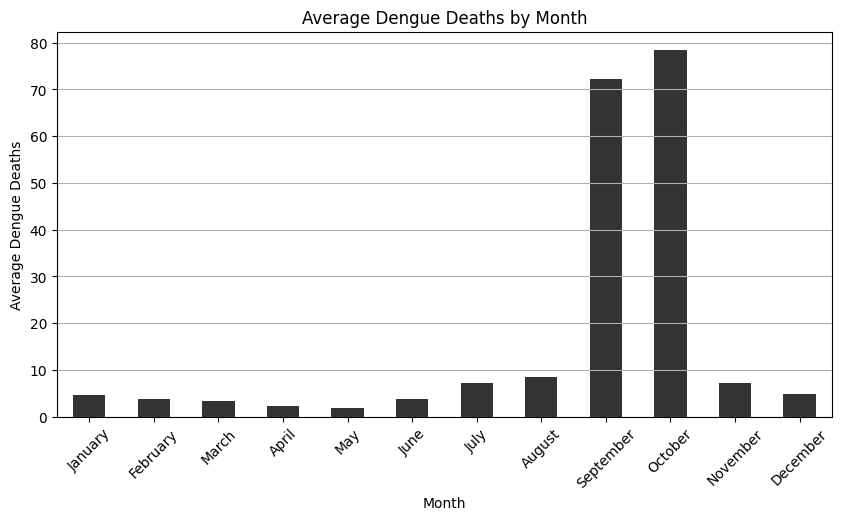

In [32]:
plt.figure(figsize=(10, 5))
monthly_deaths = df.groupby("Month")["Dengue_Deaths"].mean()
monthly_deaths.index = pd.Categorical(monthly_deaths.index, categories=month_order, ordered=True)
monthly_deaths = monthly_deaths.sort_index()

monthly_deaths.plot(kind="bar", color="Black", alpha=0.8)

plt.title("Average Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Deaths")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

<h1>Insight #11: Dengue Trend from 2016 - 2020



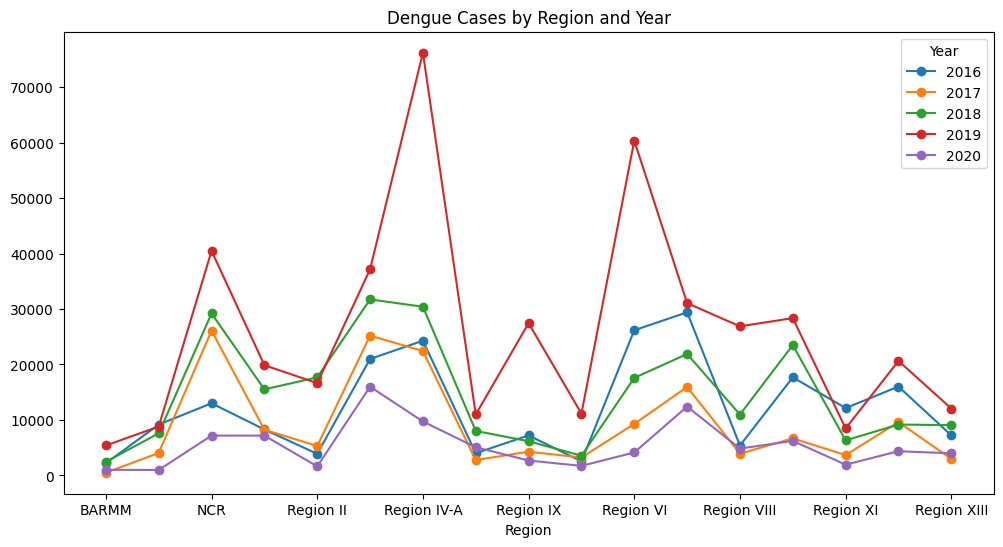

In [33]:
timeseries = df.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
timeseries.plot(figsize=(12, 6), title='Dengue Cases by Region and Year', marker='o')
plt.show()

<h1>Insight #12: Dengue Cases in Each Seasons </h1>



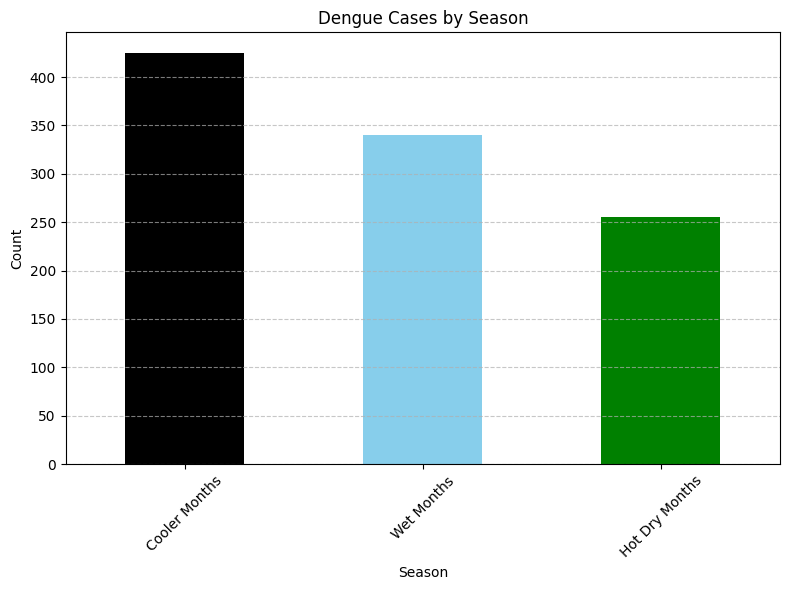

In [36]:
def season_group(month):
    if month in ['October', 'November', 'December', 'January', 'February']:
        return 'Cooler Months'
    elif month in ['March', 'April', 'May']:
        return 'Hot Dry Months'
    elif month in ['June', 'July', 'August', 'September']:
        return 'Wet Months'
    else:
        return 'Unknown'
    
df['Season'] = df['Month'].apply(season_group)
season_counts = df['Season'].value_counts()

season_counts.plot(kind='bar', color=['black', 'skyblue', 'green'], figsize=(8, 6))
plt.title('Dengue Cases by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Insight #13:Dengue Death Trend from 2016 - 2020 </h1>



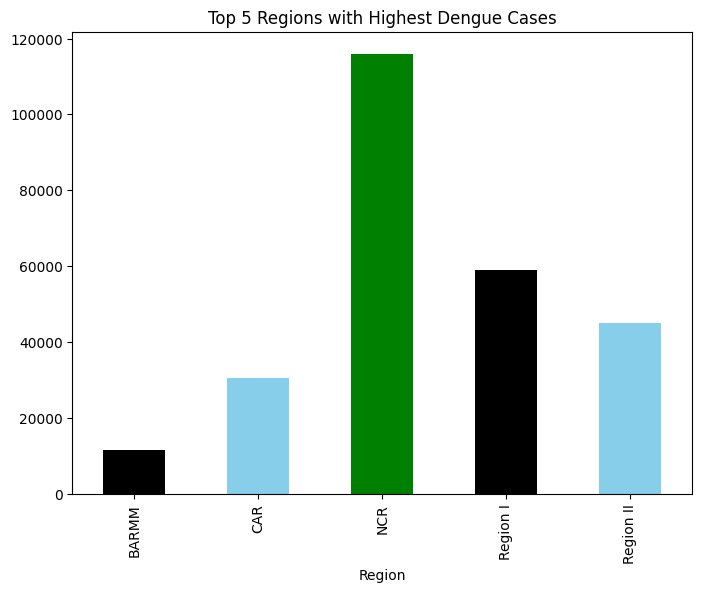

In [39]:
Top = df.groupby('Region')['Dengue_Cases'].sum().head(5)

Top.plot(kind='bar', color=['black', 'skyblue', 'green'], figsize=(8, 6))
plt.title('Top 5 Regions with Highest Dengue Cases')
plt.show()

<h1>Insight #14:Dengue Death Trend from 2016 - 2020 </h1>



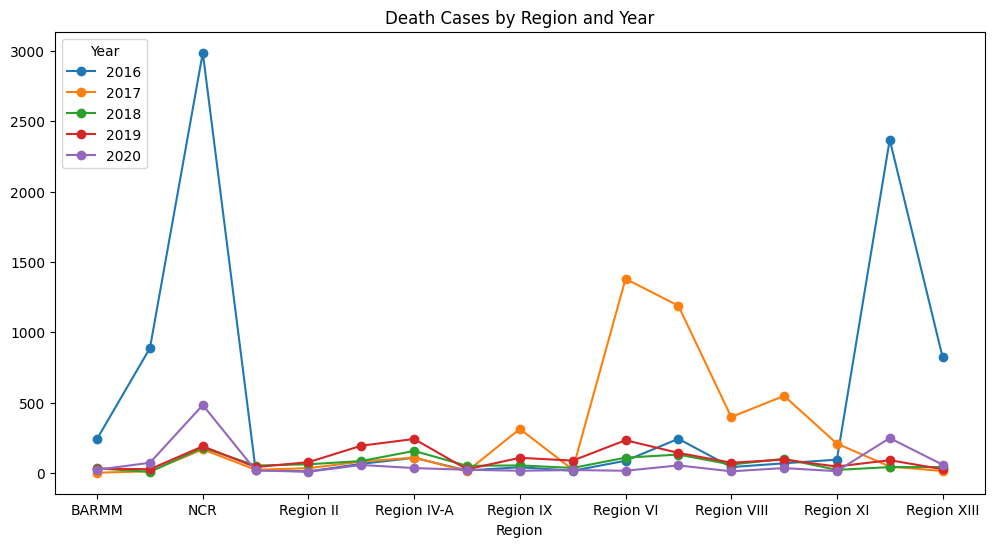

In [40]:
timeseries = df.groupby(['Region', 'Year'])['Dengue_Deaths'].sum().unstack()
timeseries.plot(figsize=(12, 6), title='Death Cases by Region and Year', marker='o')
plt.show()

<h1>Insight #15 Top 5 Region with Highest number of Dengue Cases </h1>



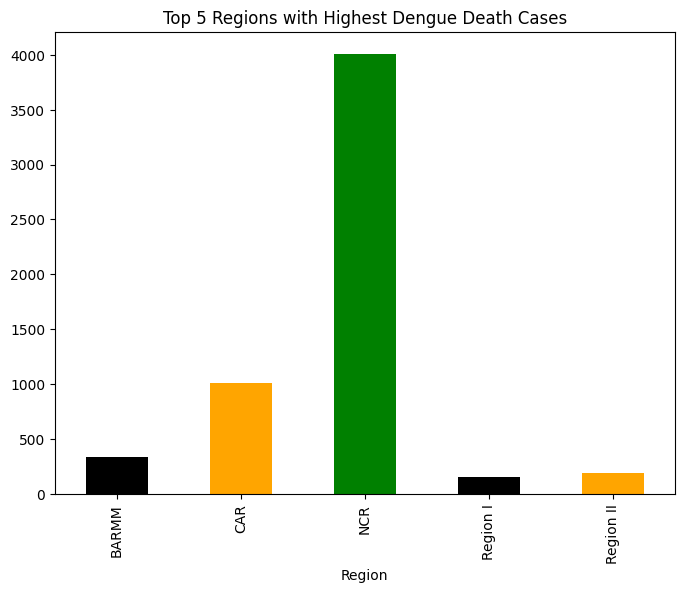

In [42]:
Top = df.groupby('Region')['Dengue_Deaths'].sum().head(5)

Top.plot(kind='bar', color=['Black', 'orange', 'Green'], figsize=(8, 6))
plt.title('Top 5 Regions with Highest Dengue Death Cases')
plt.show()


<h1>Insight #16 Dengue Cases in Region I from 2016</h1>



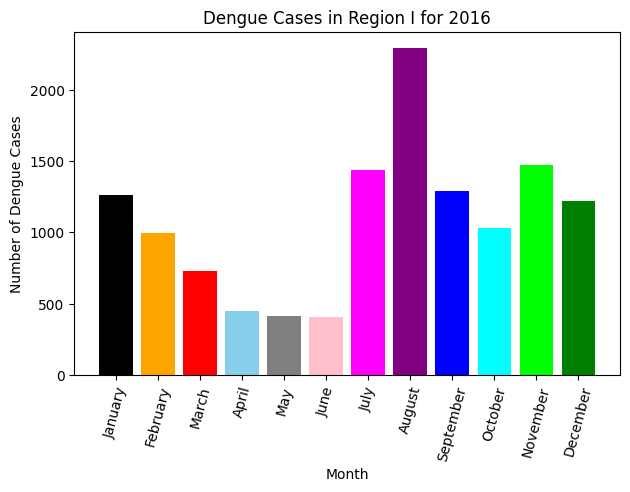

In [48]:
RI2016 = df[(df['Region'] == 'NCR') & (df['Year'] == 2016)]
plt.bar(RI2016['Month'], RI2016['Dengue_Cases'], color=['Black', 'orange', 'red', 'skyblue', 'grey', 'pink', 'magenta', 'purple', 'blue', 'cyan', 'lime', 'green'])
plt.xticks(rotation=75)
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.tight_layout()
plt.title('Dengue Cases in Region I for 2016')
plt.show()

In [51]:
df2016 = df[df['Year'] == 2016]
df2017 = df[df['Year'] == 2017]
df2018 = df[df['Year'] == 2018]
df2019 = df[df['Year'] == 2019]
df2020 = df[df['Year'] == 2020]

<h1>Insight #17 Correlation of Dengue Cases with Dengue Death</h1>


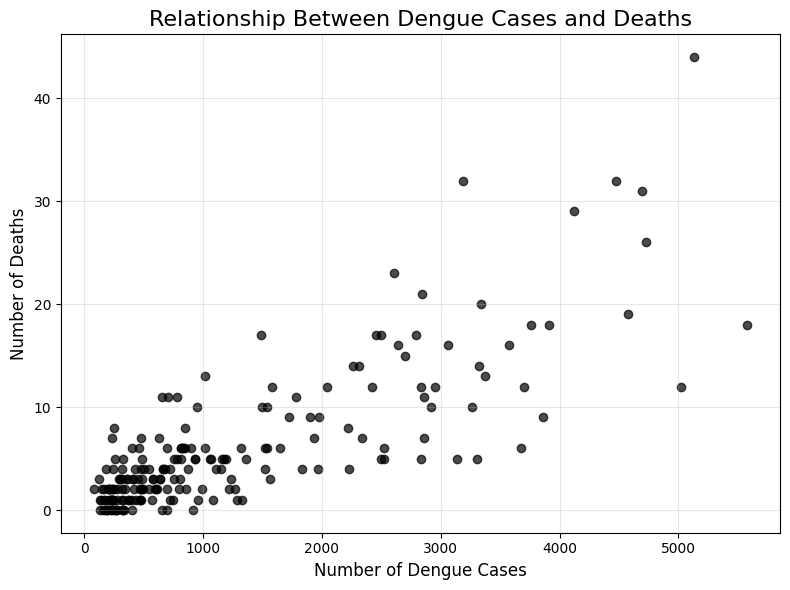

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df2018['Dengue_Cases'], df2018['Dengue_Deaths'], color='Black', alpha=0.7, edgecolor='k')
plt.title('Relationship Between Dengue Cases and Deaths', fontsize=16)
plt.xlabel('Number of Dengue Cases', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<h1>Insight #18 Which month has the highest number of dengue cases in each region?</h1>

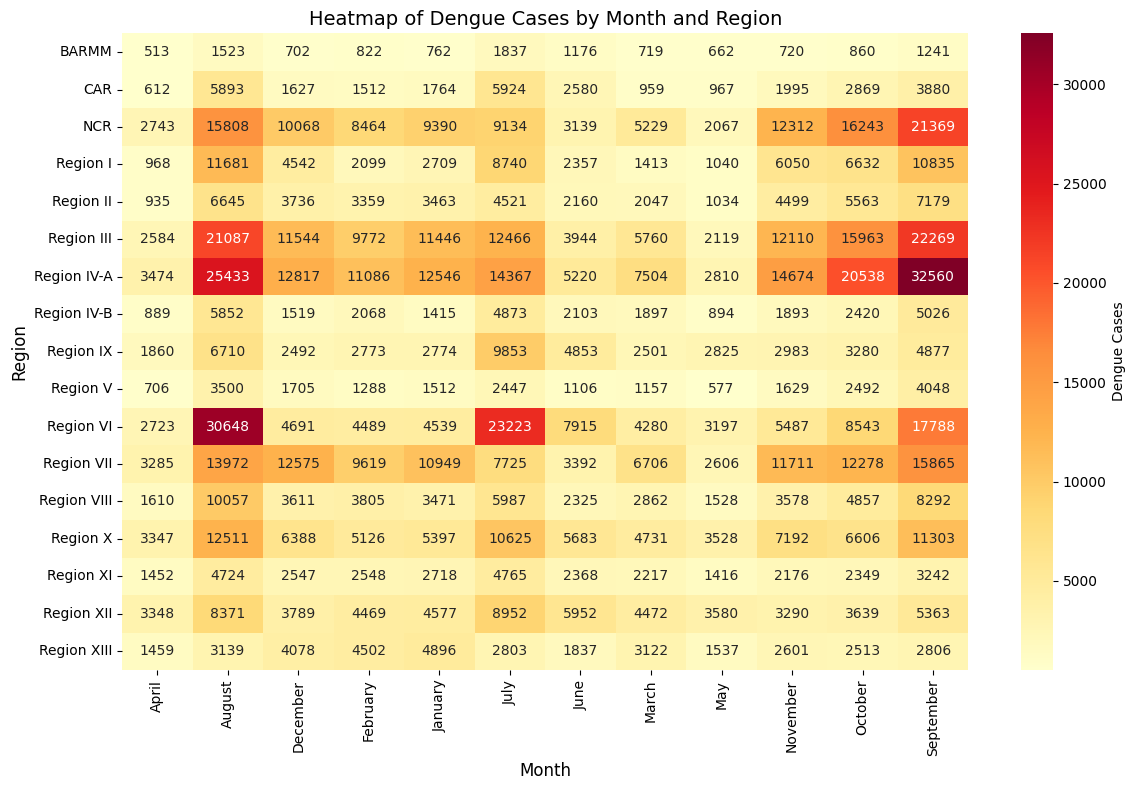

In [54]:
heatmap_data = df.pivot_table(index='Region', columns='Month', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Dengue Cases'})
plt.title('Heatmap of Dengue Cases by Month and Region', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

<h1>Insight #19 Top 5 Regions with Highest Dengue Cases During Hot and Dry Month</h1>

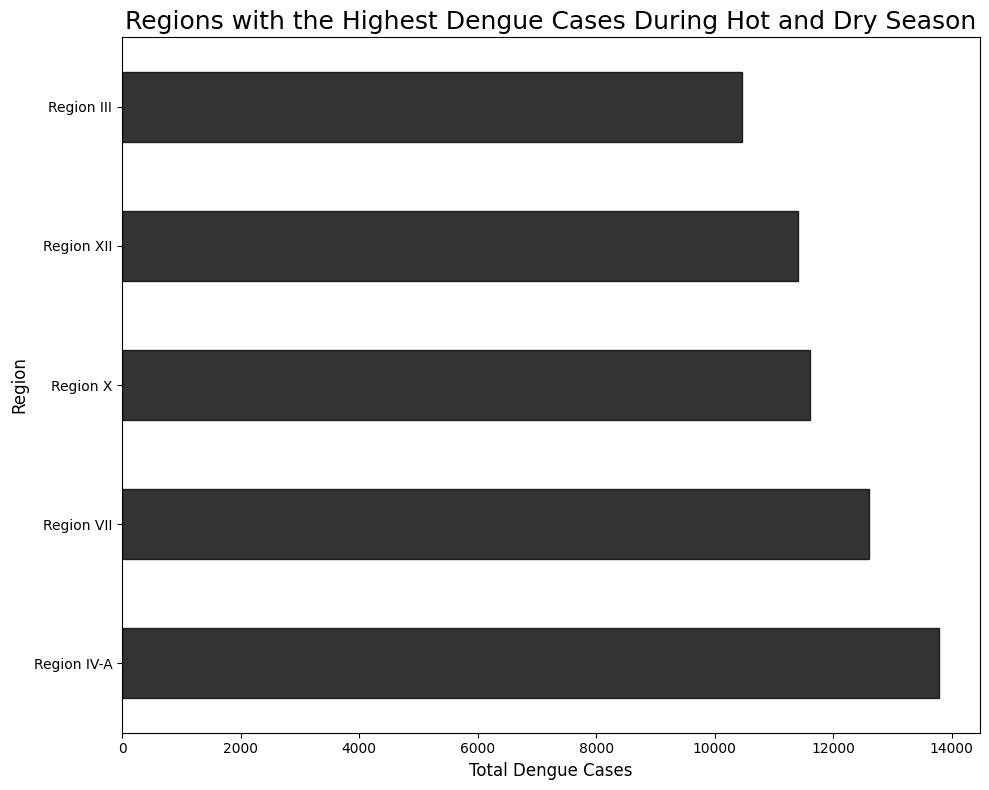

In [56]:
hot_dry_season = ['March', 'April', 'May']
filtered_df = df[df['Month'].isin(hot_dry_season)]
region_cases = filtered_df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(10, 8))
region_cases.plot(kind='barh', color='Black', alpha=0.8, edgecolor='k')
plt.title('Regions with the Highest Dengue Cases During Hot and Dry Season', fontsize=18)
plt.xlabel('Total Dengue Cases', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

<h1>Insight #20 Top 5 Regions with Highest Dengue Cases During Hot and Dry Month</h1>

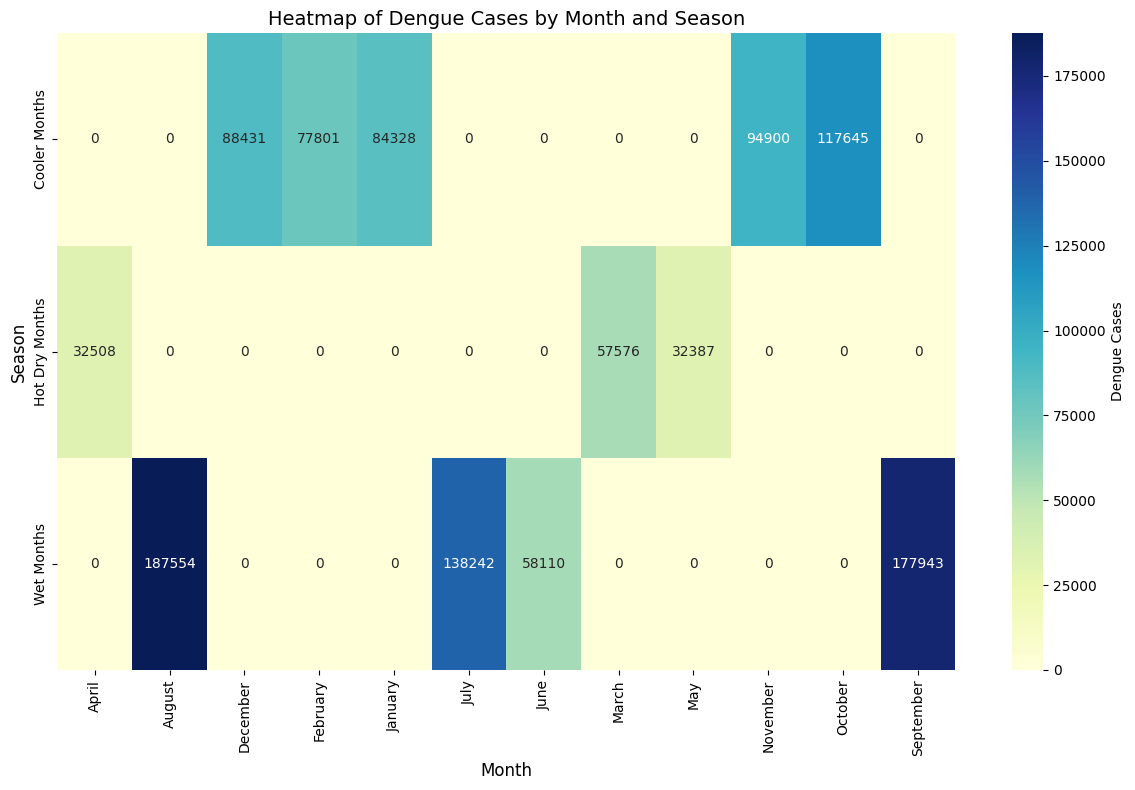

In [58]:
heatmap_data = df.pivot_table(index='Season', columns='Month', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Dengue Cases'})
plt.title('Heatmap of Dengue Cases by Month and Season', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.tight_layout()
plt.show()